### MODELS IMPLEMENTED

### ASSOCIATION RULE MINING (ARM)

Association Rule Mining (ARM) is a fundamental technique in data mining used to identify relationships or patterns among items in large datasets. It is widely applied in market basket analysis, recommendation systems, and customer behavior analysis. ARM helps uncover rules like:

"If a customer buys product A, they are likely to buy product B."

### Key Metrics in ARM

Support: How frequently an itemset appears in the dataset.

Confidence: The likelihood that item B is purchased if item A is purchased.

Lift: The strength of the association between item A and item B.

In [1]:
# import necessary libraries after execution state reset
import pandas as pd

# Load the cleaned dataset again
file_path = "/content/bank_cleaned_data.csv"
df = pd.read_csv(file_path)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,Unknown,5,may,261,1,-1,0,Unknown,no
1,44,technician,single,secondary,no,29,yes,no,Unknown,5,may,151,1,-1,0,Unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,Unknown,5,may,76,1,-1,0,Unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,Unknown,5,may,92,1,-1,0,Unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,Unknown,5,may,198,1,-1,0,Unknown,no


In [2]:
# Preprocessing for Association Rule Mining (ARM)

# Convert categorical variables into transaction format (One-Hot Encoding)
df_transformed = df.drop(columns=['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day_of_week', 'month'])  # Removing numerical variables

# Convert categorical variables to one-hot encoded format
df_encoded = pd.get_dummies(df_transformed)

# Convert the dataframe into a list of lists (Transaction format)
transactions = df_encoded.apply(lambda row: list(row[row == 1].index), axis=1).tolist()

# Display a sample of transaction data
transactions[:5]


[['job_management',
  'marital_married',
  'education_tertiary',
  'default_no',
  'housing_yes',
  'loan_no',
  'contact_Unknown',
  'poutcome_Unknown',
  'y_no'],
 ['job_technician',
  'marital_single',
  'education_secondary',
  'default_no',
  'housing_yes',
  'loan_no',
  'contact_Unknown',
  'poutcome_Unknown',
  'y_no'],
 ['job_entrepreneur',
  'marital_married',
  'education_secondary',
  'default_no',
  'housing_yes',
  'loan_yes',
  'contact_Unknown',
  'poutcome_Unknown',
  'y_no'],
 ['job_blue-collar',
  'marital_married',
  'education_secondary',
  'default_no',
  'housing_yes',
  'loan_no',
  'contact_Unknown',
  'poutcome_Unknown',
  'y_no'],
 ['job_blue-collar',
  'marital_single',
  'education_secondary',
  'default_no',
  'housing_no',
  'loan_no',
  'contact_Unknown',
  'poutcome_Unknown',
  'y_no']]

In [3]:
# Save the transactional data as a CSV file without a header row
transactions_csv_path = "/content/transactions.csv"

# Convert list of lists to a DataFrame
transactions_df = pd.DataFrame(transactions)

In [4]:
# Save without headers and without index
transactions_df.to_csv(transactions_csv_path, index=False, header=False)

In [5]:
# Provide download link
transactions_csv_path

transactions_df.head()

,0,1,2,3,4,5,6,7,8
0,job_management,marital_married,education_tertiary,default_no,housing_yes,loan_no,contact_Unknown,poutcome_Unknown,y_no
1,job_technician,marital_single,education_secondary,default_no,housing_yes,loan_no,contact_Unknown,poutcome_Unknown,y_no
2,job_entrepreneur,marital_married,education_secondary,default_no,housing_yes,loan_yes,contact_Unknown,poutcome_Unknown,y_no
3,job_blue-collar,marital_married,education_secondary,default_no,housing_yes,loan_no,contact_Unknown,poutcome_Unknown,y_no
4,job_blue-collar,marital_single,education_secondary,default_no,housing_no,loan_no,contact_Unknown,poutcome_Unknown,y_no


In [8]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.7 MB/s eta 0:00:00


Top 15 Rules by Support:
                         antecedents                     consequents  \
51                         (loan_no)                    (default_no)   
50                      (default_no)                       (loan_no)   
165                           (y_no)              (poutcome_Unknown)   
164               (poutcome_Unknown)                          (y_no)   
960   (poutcome_Unknown, default_no)                          (y_no)   
961               (default_no, y_no)              (poutcome_Unknown)   
962               (poutcome_Unknown)              (default_no, y_no)   
963                           (y_no)  (poutcome_Unknown, default_no)   
923                     (default_no)                 (loan_no, y_no)   
922                  (loan_no, y_no)                    (default_no)   
915                     (default_no)     (poutcome_Unknown, loan_no)   
914      (poutcome_Unknown, loan_no)                    (default_no)   
16                      (default_no)   

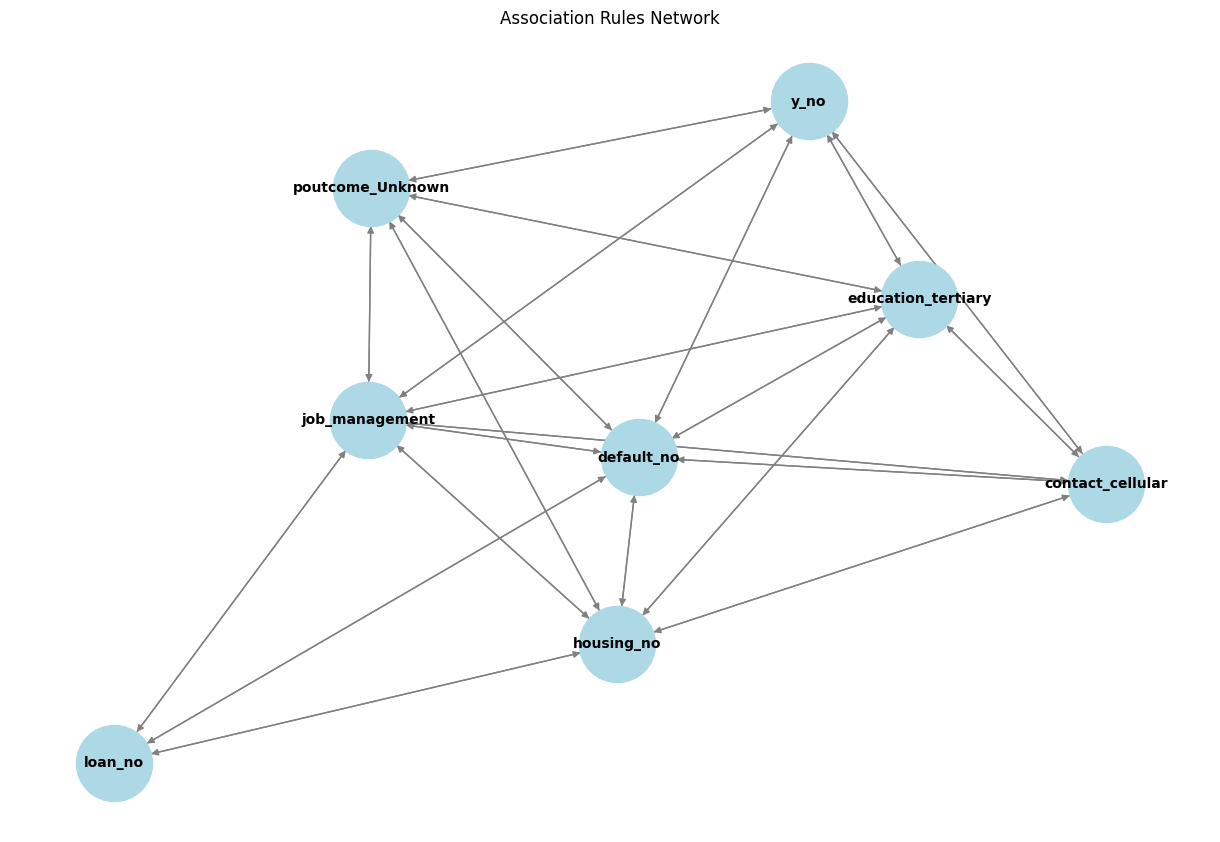

In [9]:
# Application of Association Rule Mining (ARM)

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the transaction dataset (update file path as needed)
transaction_data_path = "/content/transactions.csv"
transactions_df = pd.read_csv(transaction_data_path, header=None)

# Convert the DataFrame into a list of transactions
transactions = transactions_df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

# Convert transactions into a format suitable for mlxtend
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df_transformed, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort and display top 15 rules based on support, confidence, and lift
top_support = rules.sort_values(by="support", ascending=False).head(15)
top_confidence = rules.sort_values(by="confidence", ascending=False).head(15)
top_lift = rules.sort_values(by="lift", ascending=False).head(15)

# Display results
print("Top 15 Rules by Support:")
print(top_support)

print("\nTop 15 Rules by Confidence:")
print(top_confidence)

print("\nTop 15 Rules by Lift:")
print(top_lift)

# Save rules as CSV for further analysis
rules.to_csv("association_rules.csv", index=False)

# Visualization: Network Graph of Rules
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for _, row in top_lift.iterrows():
    for item in row["antecedents"]:
        for consequence in row["consequents"]:
            G.add_edge(item, consequence, weight=row["lift"])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight="bold")
plt.title("Association Rules Network")
plt.show()

* "loan_no" is strongly connected

"loan_no" is associated with multiple attributes, including housing_no, job_management, and default_no.
This suggests that people who do not have a loan are also more likely to not have housing loans and may have specific job roles (like management).

* "job_management" is central to multiple associations

It connects with default_no, poutcome_Unknown, and housing_no.
This suggests that individuals in management roles are likely to have specific financial behaviors.

* "y_no" (no subscription to the term deposit) is linked to multiple features

The outcome y_no (indicating no subscription to the marketing campaign) is associated with contact_cellular, education_tertiary, and default_no.
This implies that people with tertiary education, no default history, and those contacted via cellular may have a pattern of declining the term deposit offer.

* "poutcome_Unknown" is frequently associated

This indicates that the previous marketing outcome being unknown is an important factor in predicting associations.

<ipython-input-12-f713ab429c9c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='rule', data=df, palette=color)


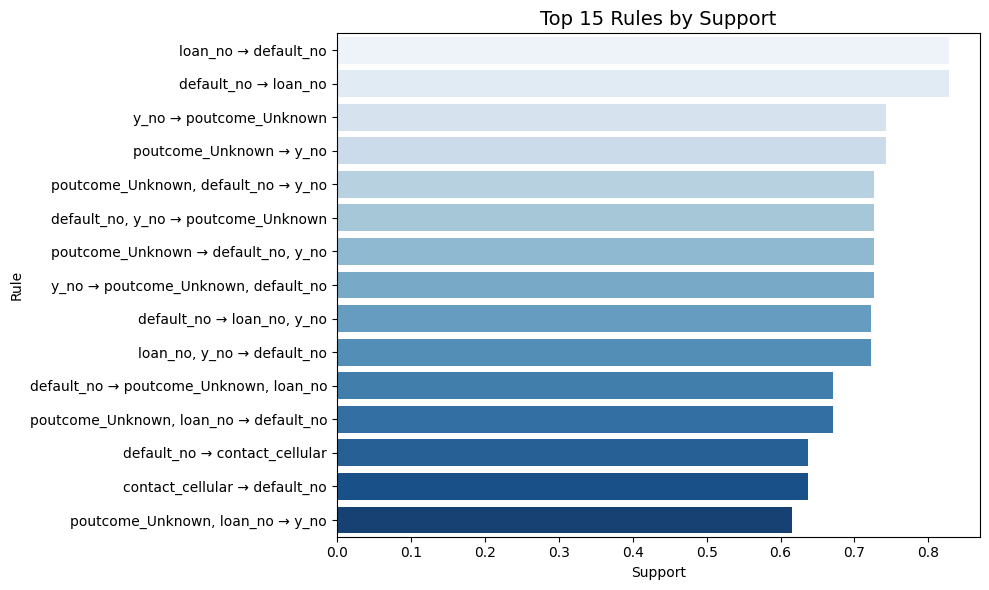

<ipython-input-12-f713ab429c9c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='rule', data=df, palette=color)


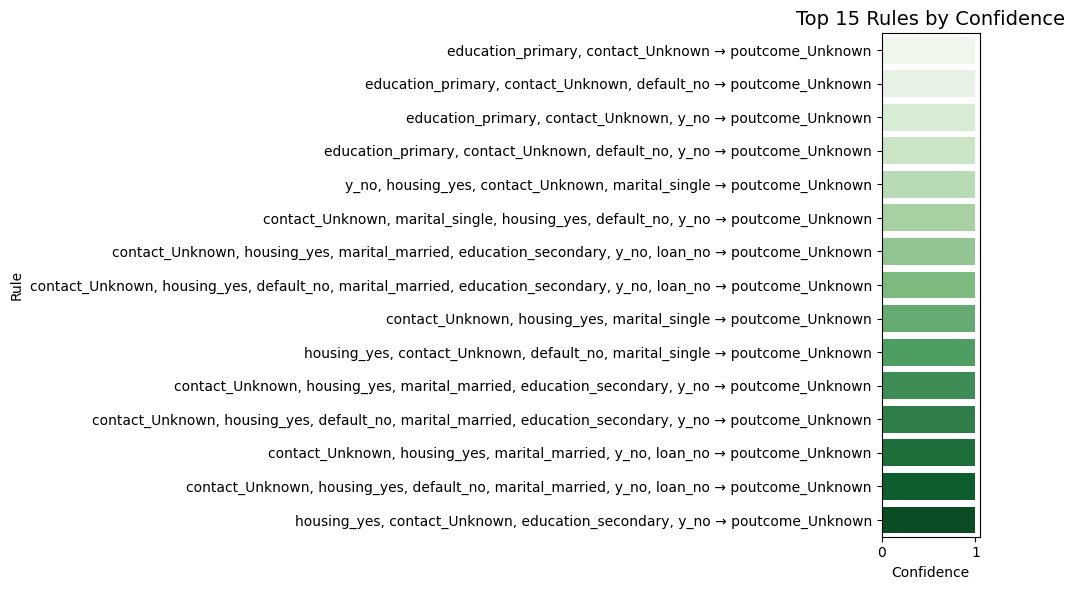

<ipython-input-12-f713ab429c9c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='rule', data=df, palette=color)


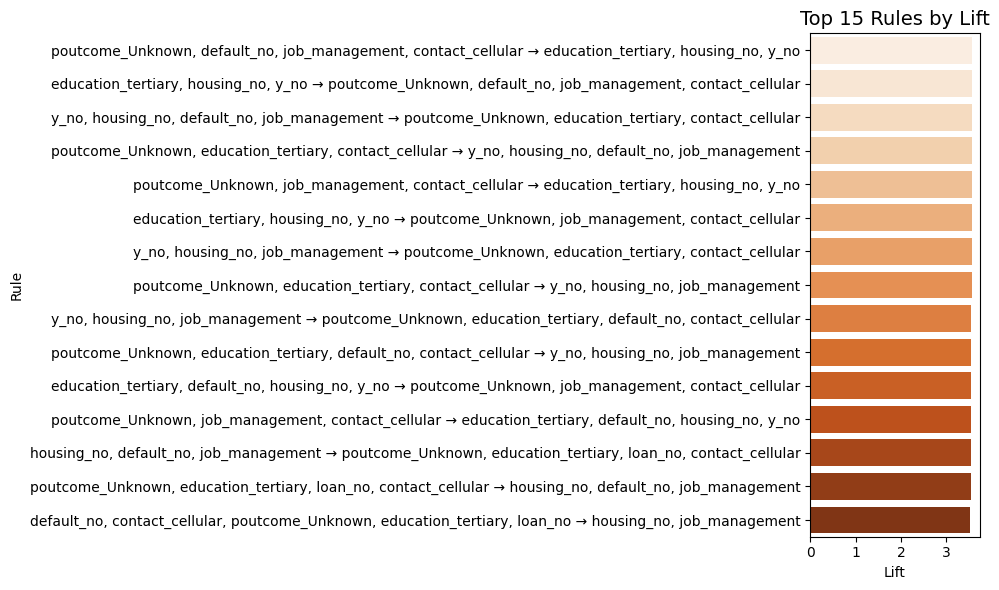

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and select top 15 rules by support, confidence, and lift
top_support = rules.sort_values(by='support', ascending=False).head(15).copy()
top_confidence = rules.sort_values(by='confidence', ascending=False).head(15).copy()
top_lift = rules.sort_values(by='lift', ascending=False).head(15).copy()

# Create a column for readable rule labels
for df in [top_support, top_confidence, top_lift]:
    df['rule'] = df['antecedents'].apply(lambda x: ', '.join(list(x))) + " → " + df['consequents'].apply(lambda x: ', '.join(list(x)))

# Plotting function
def plot_top_rules(df, metric, color):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metric, y='rule', data=df, palette=color)
    plt.title(f'Top 15 Rules by {metric.capitalize()}', fontsize=14)
    plt.xlabel(metric.capitalize())
    plt.ylabel('Rule')
    plt.tight_layout()
    plt.show()

# Plot each set
plot_top_rules(top_support, 'support', 'Blues')
plot_top_rules(top_confidence, 'confidence', 'Greens')
plot_top_rules(top_lift, 'lift', 'Oranges')


Support measures how frequently a rule appears in the dataset. Higher support means the rule involves items that often occur together.

Observations from the Graph:

* The most frequent rule is loan_no → default_no, suggesting that many clients who did not take a loan also did not default, highlighting a strong general trend.

* Rules like y_no → poutcome_Unknown and default_no → loan_no also have high support, showing common behavioral patterns among clients.

* Many rules here involve the absence of default or loan, indicating that the dataset is skewed toward cautious or financially stable individuals.

These rules might not be the most surprising, but they reflect the dominant patterns in the data and can help with baseline decision-making.

Confidence indicates the likelihood of the consequent occurring given the antecedent. Higher confidence means the rule is more predictive.

Observations from the Graph:

* Most top rules predict poutcome_Unknown, which may suggest follow-ups were either not effective or not recorded.

* The rule education_primary, contact_Unknown → poutcome_Unknown has perfect or near-perfect confidence, implying that this combination almost always results in an unknown campaign outcome.

* Multiple rules involve contact_Unknown and housing_yes, hinting that certain demographics consistently led to unclear or unrecorded outcomes.

High-confidence rules are useful for making targeted predictions — e.g., identifying which customer profiles are most likely to lead to specific results.

Lift evaluates the strength of a rule compared to random chance. A lift > 1 means the rule is more significant than what would happen by coincidence.

Observations from the Graph:

* The rule poutcome_Unknown, default_no, job_management, contact_cellular → education_tertiary, housing_no, y_no has the highest lift, revealing a strong and non-obvious relationship between job type, contact method, and campaign response.

* Many rules with high lift include education_tertiary, job_management, and housing_no, suggesting that individuals with higher education and certain job types form a highly correlated behavioral group.

* Compared to support/confidence graphs, these rules are less frequent but more insightful, often revealing niche but valuable segments.

Lift helps identify hidden patterns — rules that are statistically stronger than they appear at first glance.

### CONCLUSION

* Financial Stability Matters – Customers who do not have loans or credit defaults show distinct behaviors in marketing campaigns.

* Past Interactions Influence Decisions – If a customer’s previous outcome is unknown, they are less likely to respond positively to new campaigns.

* Communication Method Impacts Response – People contacted via cellular show different trends compared to other methods.

* Demographics Play a Role – Marital status, education, and job type have a strong influence on financial and marketing decisions.